In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import os, glob

from drama import utils as drtls

In [73]:
datadir = '/Users/plopezdekker/LocalDATA/WaddenSAR/data_sample_WaddenSAR_march2022/'
timestrs = ['20220314141810', '20220316113350']
def msfname(datadir, bistatic=True, timestr='20220314141810', rxpol='V', txpol='V', fore='True'):
    if bistatic:
        str1 = 'BISAR_CPLX_'
        str2 = '_1_5.3G_'
        if rxpol == 'H':
            rxch = '2'
        else:
            rxch = '1'
    else:
        str1 = 'SAR_CPLX_'
        str2 = '_2_5.3G_'
        if rxpol == 'H':
            rxch = '1'
        else:
            rxch = '2'

    if fore:
        txch = '1'
    else:
        txch = '2'
    fstr = str1 + timestr + str2+ txpol + rxpol + '_' + txch + rxch
    searchstr = ("%s_*.nc" % os.path.join(datadir, fstr))
    fls = glob.glob(searchstr)
    return fls[0]

def ql_int(xrdata, az1,naz, vmax=1, ax=None, cal=True, vmin=None):
    slc = (xrdata.SigmaImageSingleLookRealPart[az1:az1+naz] 
           + 1j*xrdata.SigmaImageSingleLookImaginaryPart[az1:az1+naz])
    sigma = np.abs(slc)**2
    
    dy = (xrdata.CrossRange.values[1] - xrdata.CrossRange.values[0])
    dx = (xrdata.GroundRange.values[1] - xrdata.GroundRange.values[0])
    azml = int(np.round(dx/dy))
    sigma = drtls.smooth(sigma, azml, axis=0)[::int(azml/2)]
    sigma = 10*np.log10(sigma)
    if cal:
        sigma = sigma + xrdata.CalImage.values[az1:az1+naz:int(azml/2)] + 160
    if ax is None:
        fig, ax =  plt.subplots()
    extent = [xrdata.GroundRange[0], xrdata.GroundRange[-1], xrdata.CrossRange[az1], xrdata.CrossRange[az1+naz]]
    im = ax.imshow(sigma, origin='lower', vmax=vmax, extent=extent, vmin=vmin)
    plt.colorbar(im,fraction=0.046, pad=0.04, ax=ax, orientation='horizontal')
    #plt.colorbar()

def ql_pha(xrdata1, xrdata2, az1,naz, vmax=1, ax=None):
    slc1 = (xrdata1.SigmaImageSingleLookRealPart[az1:az1+naz] 
           + 1j*xrdata1.SigmaImageSingleLookImaginaryPart[az1:az1+naz])
    slc2 = (xrdata2.SigmaImageSingleLookRealPart[az1:az1+naz] 
           + 1j*xrdata2.SigmaImageSingleLookImaginaryPart[az1:az1+naz])
    interf = slc1 * np.conj(slc2)
    dy = (xrdata1.CrossRange.values[1] - xrdata1.CrossRange.values[0])
    dx = (xrdata1.GroundRange.values[1] - xrdata1.GroundRange.values[0])
    azml = int(np.round(dx/dy))
    interf = drtls.smooth(interf, azml, axis=0)[::int(azml/2)]
    if ax is None:
        fig, ax =  plt.subplots()
    extent = [xrdata1.GroundRange[0], xrdata1.GroundRange[-1], xrdata1.CrossRange[az1], xrdata1.CrossRange[az1+naz]]
    im = ax.imshow(np.angle(interf), origin='lower', vmax=vmax, extent=extent, cmap='hsv')
    plt.colorbar(im,fraction=0.046, pad=0.04, ax=ax, orientation='horizontal')
    
    
msfname(datadir, False)

'/Users/plopezdekker/LocalDATA/WaddenSAR/data_sample_WaddenSAR_march2022/SAR_CPLX_20220314141810_2_5.3G_VV_12_pres_16_fdc_219.sar.sig.nc'

In [109]:
rxpol = 'H'
xr_vv_1 = xr.open_dataset(msfname(datadir,False, timestrs[1], fore=True, rxpol=rxpol))
xr_vv_2 = xr.open_dataset(msfname(datadir,False, timestrs[1], fore=False, rxpol=rxpol))
xr_bvv_1 = xr.open_dataset(msfname(datadir,True, timestrs[1], fore=True, rxpol=rxpol))
xr_bvv_2 = xr.open_dataset(msfname(datadir,True, timestrs[1], fore=False, rxpol=rxpol))
print(xr_vv_1.ModelTransformationTag)
print(xr_bvv_1.ModelTransformationTag)
xr_vv_1

<xarray.DataArray 'ModelTransformationTag' (ModelTransformationTagCols: 4, ModelTransformationTagRows: 4)>
array([[ 9.538482e-01,  1.757889e+00,  0.000000e+00,  0.000000e+00],
       [-3.515778e-01,  1.907696e-01,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 6.656950e+05,  5.898370e+06,  0.000000e+00,  1.000000e+00]])
Dimensions without coordinates: ModelTransformationTagCols, ModelTransformationTagRows
Attributes:
    long_name:  ModelTransformationTag
    units:      []
<xarray.DataArray 'ModelTransformationTag' (ModelTransformationTagCols: 4, ModelTransformationTagRows: 4)>
array([[ 9.538482e-01,  1.757889e+00,  0.000000e+00,  0.000000e+00],
       [-3.515778e-01,  1.907696e-01,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 6.653609e+05,  5.898595e+06,  0.000000e+00,  1.000000e+00]])
Dimensions without coordinates: ModelTransformationTagCols, ModelTransforma

<xarray.Dataset>
Dimensions:                            (GroundRange: 672, CrossRange: 37616, GPSTime: 49364, AntPatternAngles: 361, ModelTransformationTagCols: 4, ModelTransformationTagRows: 4, GBPGridInfo: 9)
Coordinates:
  * GroundRange                        (GroundRange) float32 590.0 ... 1.932e+03
  * CrossRange                         (CrossRange) float32 -7.898e+03 ... 7....
  * GPSTime                            (GPSTime) float64 3.008e+05 ... 3.011e+05
  * AntPatternAngles                   (AntPatternAngles) float64 -180.0 ... ...
  * GBPGridInfo                        (GBPGridInfo) float64 6.59e+05 ... -1.074
Dimensions without coordinates: ModelTransformationTagCols, ModelTransformationTagRows
Data variables: (12/61)
    SigmaImageSingleLookRealPart       (CrossRange, GroundRange) float64 ...
    SigmaImageSingleLookImaginaryPart  (CrossRange, GroundRange) float64 ...
    LatImage                           (CrossRange, GroundRange) float64 ...
    LonImage                           (CrossRange, GroundRange) float64 ...
    DEMImage                           (CrossRange, GroundRange) float32 ...
    OrbLatImage                        (CrossRange, GroundRange) float64 ...
    ...                                 ...
    Latitude22                         float64 ...
    Longitude22                        float64 ...
    UTMZone                            int32 ...
    Hemisphere                         int32 ...
    SystemType                         |S1 ...
    Dummy                              int32 ...
Attributes:
    Title:     Track : 20220316113350
    Source:    MetaSensing Airborne SAR
    History:   02-Apr-2022 22:30:52 File Generation
    Comments:  T:\WaddenSAR_Project\C2\20220316113350

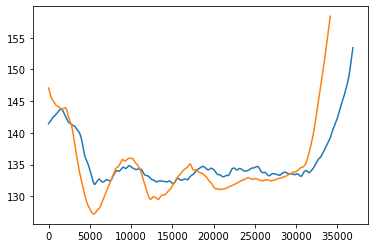

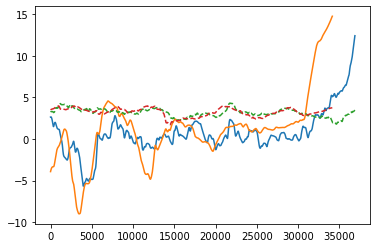

In [21]:
plt.figure()
plt.plot(xr_vv_1.OrbitHeading)
plt.plot(xr_bvv_1.OrbitHeading)
plt.figure()
plt.plot(xr_vv_1.OrbitRoll)
plt.plot(xr_bvv_1.OrbitRoll)
plt.plot(xr_vv_1.OrbitPitch,'--')
plt.plot(xr_bvv_1.OrbitPitch, '--')

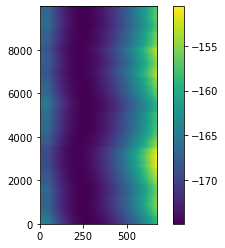

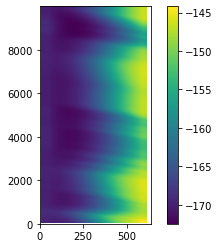

In [101]:
xr_vv_1.CalImage.shape
plt.figure()
#plt.imshow(10**(xr_vv_1.CalImage[0:10000,:]/10), aspect=1/8)
#plt.imshow((xr_vv_1.OrbHeightImage[0:10000,:]-xr_vv_2.OrbHeightImage[0:10000,:]), aspect=1/8)
plt.imshow(xr_vv_1.CalImage[1100:11100,:], aspect=1/8,origin='lower')
#plt.imshow(6.3e6*np.radians(xr_vv_1.OrbLatImage[0:10000,:]-xr_vv_2.OrbLatImage[0:10000,:]), aspect=1/8)
plt.colorbar()
plt.figure()
plt.imshow(xr_bvv_1.CalImage[0:10000,:], aspect=1/8,origin='lower')
#plt.imshow(6.3e6*np.radians(xr_bvv_1.OrbLatImage[0:10000,:]-xr_bvv_2.OrbLatImage[0:10000,:]), aspect=1/8)
plt.colorbar()

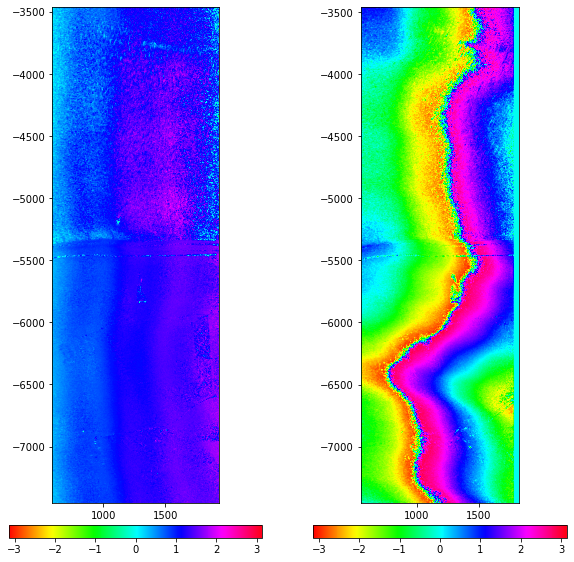

In [110]:

fsmp=1100
lsmp= fsmp + 4000
#plt.figure(figsize=(5,20))
fig, axs = plt.subplots(1,2,figsize=(10,10))
ql_pha(xr_vv_1,xr_vv_2, fsmp, 10000, ax=axs[0],vmax=np.pi)
#plt.figure(figsize=(5,20))
ql_pha(xr_bvv_1,xr_bvv_2, fsmp-1000, 10000, vmax=np.pi, ax=axs[1])

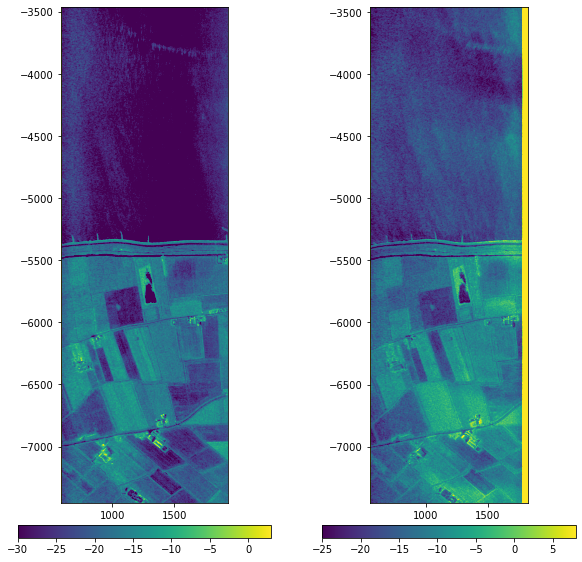

In [111]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
ql_int(xr_vv_1, fsmp, 10000, ax=axs[0],vmax=3,vmin=-30,cal=False)
#plt.figure(figsize=(5,20))
ql_int(xr_bvv_1, fsmp-1000, 10000, vmax=8,vmin=-25, ax=axs[1], cal=False)

In [108]:
xr_bvv_1 = xr.open_dataset(msfname(datadir,True, timestrs[1], fore=True))
xr_bvv_2 = xr.open_dataset(msfname(datadir,True, timestrs[1], fore=False))
aa = (xr_bvv_1.CrossRange[1] - xr_bvv_1.CrossRange[0]).values


In [78]:
bslc_vv_1 = xr_bvv_1.SigmaImageSingleLookRealPart + 1j*xr_bvv_1.SigmaImageSingleLookImaginaryPart
bslc_vv_2 = xr_bvv_2.SigmaImageSingleLookRealPart + 1j*xr_bvv_2.SigmaImageSingleLookImaginaryPart

In [108]:
bfsmp = fsmp - 900
blsmp = lsmp - 900
plt.figure(figsize=(20,20))
plt.imshow(drtls.smooth(np.abs(bslc_vv_1[bfsmp:blsmp])**2,3)**0.5, origin='lower', vmax=2)
plt.colorbar()
plt.figure(figsize=(20,20))
plt.imshow(np.angle(drtls.smooth(bslc_vv_2[bfsmp:blsmp]* np.conj(bslc_vv_1[bfsmp:blsmp]),3)), origin='lower', cmap='hsv')
plt.colorbar()

NameError: name 'bslc_vv_1' is not defined

<Figure size 1440x1440 with 0 Axes>